In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import tweepy
import re
from nltk.stem.wordnet import WordNetLemmatizer

In [45]:
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [46]:
CONSUMER_KEY    = '2RozKckGnOzNcrtaWu3VXKJSx'
CONSUMER_SECRET = '8l0Pr26BZfTg1ZPsGgyj7CW93SETiLylSTRvbzjI2BEScDALnE'
#CONSUMER_KEY    = '7iWJ6ayUz96PİZdCx9ILDMpsH'
#CONSUMER_SECRET = '7Uto2zs1BocYiHCms599gK5psRe7dMrfJPVJ3axKQ71QbrsbYu'

# Access:
ACCESS_TOKEN  = '1416435420-b7yPVE7YAK5NlwJpOKIouqrk2q94xNY87fnIZ3M'
ACCESS_SECRET = 'M76xd99ZIcuTSwoXJReo8BFqOAKl288oZJbbsQFGvujiC'

def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

In [47]:
extractor = twitter_setup()

In [48]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [49]:
lemmatizer=WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text = ' '.join([lemmatizer.lemmatize(i, pos='v') for i in text.split(' ')])
    return lem_text

In [50]:
PIAData = extractor.user_timeline(screen_name="Official_PIA", count=100)
print("Number of tweets extracted: {}.\n".format(len(PIAData)))

Number of tweets extracted: 99.



In [51]:
PIAData = pd.DataFrame(data=[tweet.text for tweet in PIAData], columns=['Tweets'])
PIAData['clean_tweet']=PIAData['Tweets'].apply(lambda x: clean_tweet(x))
PIAData['processed_tweet_lem']=PIAData['clean_tweet'].apply(lambda x: word_lemmatizer(x))
PIAData['sentiment']=loaded_model.predict(PIAData['processed_tweet_lem'])
PIAData

,Tweets,clean_tweet,processed_tweet_lem,sentiment
0,RT @AbdulqadirARY: دوران پرواز طیارے میں رہ جا...,RT PIA,RT PIA,-1
1,RT @AbdulqadirARY: @ghafari365 @Official_PIA ج...,RT PIA,RT PIA,-1
2,"Eat like a local in Copenhagen, and relish Dan...",Eat like a local in Copenhagen and relish Dani...,Eat like a local in Copenhagen and relish Dani...,-1
3,Europe trippin' is on! Take a trip to Barcelon...,Europe trippin is on Take a trip to Barcelona ...,Europe trippin be on Take a trip to Barcelona ...,0
4,"Love is in the air, so treat your special some...",Love is in the air so treat your special someo...,Love be in the air so treat your special someo...,1
...,...,...,...,...
94,@drfaiziii Its work in progress Faizi,Its work in progress Faizi,Its work in progress Faizi,-1
95,No need to travel light! Bringing you an upgra...,No need to travel light Bringing you an upgrad...,No need to travel light Bringing you an upgrad...,0
96,New Year Sale! Travel from Canada to Pakistan ...,New Year Sale Travel from Canada to Pakistan f...,New Year Sale Travel from Canada to Pakistan f...,0
97,Pakistan has been declared as the world’s 3rd ...,Pakistan has been declared as the world s 3rd ...,Pakistan have be declare as the world s 3rd hi...,-1


In [52]:
PIAData.head(20)

,Tweets,clean_tweet,processed_tweet_lem,sentiment
0,RT @AbdulqadirARY: دوران پرواز طیارے میں رہ جا...,RT PIA,RT PIA,-1
1,RT @AbdulqadirARY: @ghafari365 @Official_PIA ج...,RT PIA,RT PIA,-1
2,"Eat like a local in Copenhagen, and relish Dan...",Eat like a local in Copenhagen and relish Dani...,Eat like a local in Copenhagen and relish Dani...,-1
3,Europe trippin' is on! Take a trip to Barcelon...,Europe trippin is on Take a trip to Barcelona ...,Europe trippin be on Take a trip to Barcelona ...,0
4,"Love is in the air, so treat your special some...",Love is in the air so treat your special someo...,Love be in the air so treat your special someo...,1
5,Travel from Pakistan to London from 1st Feb ti...,Travel from Pakistan to London from 1st Feb ti...,Travel from Pakistan to London from 1st Feb ti...,0
6,"Experience the style hub of Italy, the most im...",Experience the style hub of Italy the most imp...,Experience the style hub of Italy the most imp...,-1
7,No better way to tour the mesmerizing city of ...,No better way to tour the mesmerizing city of ...,No better way to tour the mesmerize city of Co...,-1
8,"From green spaces, panoramic views to vintage ...",From green spaces panoramic views to vintage m...,From green space panoramic view to vintage mus...,-1
9,Travel from Pakistan to London from 1st Feb ti...,Travel from Pakistan to London from 1st Feb ti...,Travel from Pakistan to London from 1st Feb ti...,0


Text(0.5, 1.0, 'Count of Sentiment')

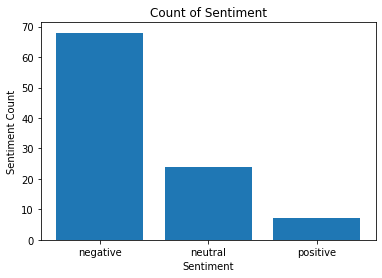

In [53]:
Sentiment_count=PIAData['sentiment'].value_counts()
Sentiment_count
Index = [1,2,3]
plt.bar(Index,Sentiment_count)
plt.xticks(Index,['negative','neutral','positive'])
plt.ylabel('Sentiment Count')
plt.xlabel('Sentiment')
plt.title('Count of Sentiment')

In [54]:
PIAData[PIAData.sentiment == 1]

,Tweets,clean_tweet,processed_tweet_lem,sentiment
4,"Love is in the air, so treat your special some...",Love is in the air so treat your special someo...,Love be in the air so treat your special someo...,1
10,Paris is not just the city of love &amp; roman...,Paris is not just the city of love amp romance...,Paris be not just the city of love amp romance...,1
14,@naeemqureshi86 @mophrd @sayedzbukhari Always ...,Always happy to help,Always happy to help,1
32,PIA observed Kashmir Solidarity Day with great...,PIA observed Kashmir Solidarity Day with great...,PIA observe Kashmir Solidarity Day with great ...,1
42,@UtkarshThakkar Thank you :),Thank you,Thank you,1
47,@usmanghani110 @mafsid Thank you Usman :),Thank you Usman,Thank you Usman,1
69,@saamirhassan Thank you for your feedback,Thank you for your feedback,Thank you for your feedback,1
